# Python Data Visualization
**Please use newest python (>=3.6), following the fashion when you don't have to maintain old codes!**

## Content
1. Introduction of basic conceptes
2. Case study by toy data
    - Single feature
    - Double feature
        - Categorical-Continuous Relationship
        - Categorical-Categorical Relationship
        - Continuous-Continuous Relationship
    - Multiple feature
        - Visual code
        - Small multiple
3. Glance of more advanced tools in the python ecosystem 

## Introduction

### Package used

In [1]:
import pandas as pd  # process tabular data.
import numpy as np  # process Nd array data, will not use too much today.
import matplotlib  # basic python ploting package.
import matplotlib.pyplot as plt 
import seaborn as sns  # scientific python ploting package, based on matplotlib, more convenient.

### Example Data

#### Background

In [21]:
data = pd.read_table('single_cell_data.tsv.gz', index_col=0)
row, col = data.shape
print(f'{row} cells with {col} columns of features')
data.head()

24896 cells with 18 columns of features


,total_reads,mapped_reads,filtered_reads,genome_coverage,mcg,mch,experiment,replicate,plate_col,plate_row,tSNE_1,tSNE_2,gene1,gene2,gene3,gene4,gene5,cluster
cell_id,,,,,,,,,,,,,,,,,,
cell_0,4061840,2765172,1932779,7.99,0.766,0.021,Exp06,Rep1,col_10,row_A,7.651,12.504,-0.803,-0.174,-0.172,0.404,-0.194,Cluster07
cell_1,3240886,2226396,1549132,6.46,0.760,0.020,Exp06,Rep1,col_10,row_A,0.222,6.903,-0.684,-0.276,-0.190,0.540,-0.331,Cluster07
cell_2,5217724,3577060,2339654,9.60,0.778,0.020,Exp06,Rep1,col_11,row_A,-11.503,-12.931,-0.501,-0.816,0.221,0.395,-0.202,Cluster03
cell_3,5552334,3742394,2353156,9.58,0.764,0.019,Exp06,Rep1,col_11,row_B,-6.435,-25.998,-0.602,-0.495,0.114,0.446,-0.257,Cluster02
cell_4,2123406,1421453,958205,4.08,0.778,0.021,Exp06,Rep1,col_04,row_D,-0.706,15.875,-0.420,-0.478,-0.178,0.567,-0.312,Cluster06


### Tidy data vs Non-tidy data
Question: Let's count how many cells are there in each well of 96-well plate, based on column plate_col and plate_row

#### [Tidy data](https://www.google.com/search?newwindow=1&rlz=1C5CHFA_enUS764US764&biw=1920&bih=960&tbm=isch&sa=1&ei=Z2GXW9AJh__TAqedpPAH&q=tidy+data&oq=tidy+data&gs_l=img.3...0.0..28091...0.0..0.0.0.......1......gws-wiz-img.vCtdDALQVJ0)
- Row is observation, col is variable

In [3]:
# some pandas magic
tidy_count_table = data.groupby(['plate_col', 'plate_row'])\
                       .apply(lambda i: i.shape[0])\
                       .reset_index()\
                       .rename(columns={0: 'cell_count'})
# done
row, col = tidy_count_table.shape
print(f'Tidy data have {row} rows and {col} columns')
tidy_count_table.head(12)

Tidy data have 96 rows and 3 columns


,plate_col,plate_row,cell_count
0,col_01,row_A,280
1,col_01,row_B,287
2,col_01,row_C,247
3,col_01,row_D,242
4,col_01,row_E,252
5,col_01,row_F,286
6,col_01,row_G,271
7,col_01,row_H,266
8,col_02,row_A,278
9,col_02,row_B,287


#### Non-tidy data
- This is what you would expect for a 96-well count table, but not easy for programming.

In [4]:
tidy_count_table.set_index(['plate_col', 'plate_row']).unstack().T

plate_col             col_01  col_02  col_03  col_04  col_05  col_06  col_07  \
           plate_row                                                           
cell_count row_A         280     278     294     281     259     272     290   
           row_B         287     287     287     280     286     278     280   
           row_C         247     266     281     274     282     281     278   
           row_D         242     291     289     272     279     279     270   
           row_E         252     274     286     242     280     276     261   
           row_F         286     266     278     272     274     263     269   
           row_G         271     266     249     264     250     260     254   
           row_H         266     255     238     249     253     256     247   

plate_col             col_08  col_09  col_10  col_11  col_12  
           plate_row                                          
cell_count row_A         275     279     282     228     176  
           row_B         277     272     283     272     195  
           row_C         271     285     280     288     180  
           row_D         283     278     276     225     168  
           row_E         259     269     273     265     184  
           row_F         263     262     268     259     169  
           row_G         235     251     265     252     158  
           row_H         210     240     243     223     148

### Why is this important?
- **Because it makes programming discription much easier. Think about > 3 variables when making plots**
- [Theoretical support](http://vita.had.co.nz/papers/tidy-data.pdf) which you won't read

### \[Not For Today\] How to play with this transformation magic?
- Use pandas, which is not discussed today, but you can find more information here:
    - [Reshape data, from non-tidy to tidy](http://pandas.pydata.org/pandas-docs/stable/reshaping.html)
    - [Concatenate, merge join data](http://pandas.pydata.org/pandas-docs/stable/merging.html)
    - [Group by data to apply function](http://pandas.pydata.org/pandas-docs/stable/groupby.html)
- All this part is super important and useful.
- For book about pandas, recommand [this](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662/ref=sr_1_4?ie=UTF8&qid=1536648478&sr=8-4&keywords=python+data+science), also have Chinese version.

### 2 Types of Feature
- Continuous Feature
- Categorical Feature

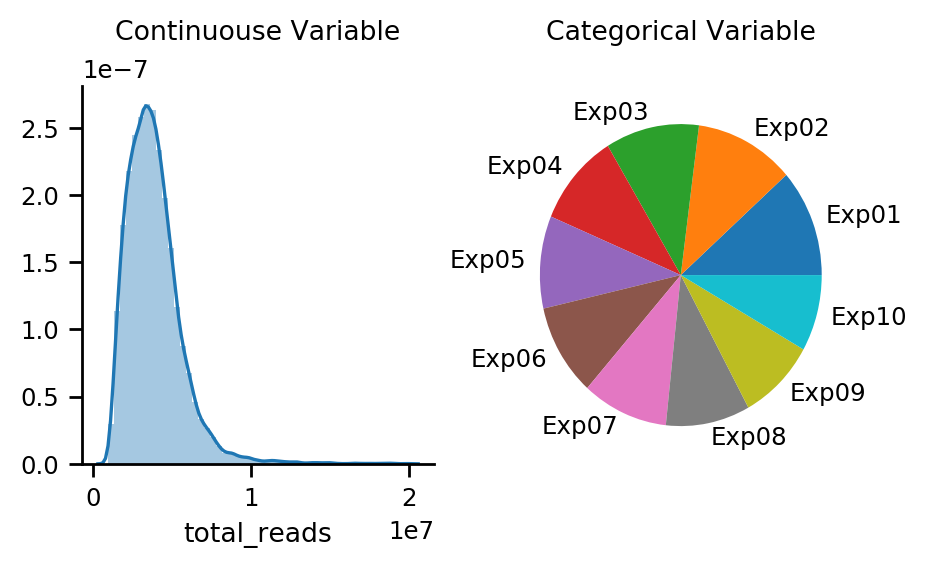

In [41]:
# a typical example of the combination of seaborn and matplotlib

# initialize
fig, ax = plt.subplots(ncols=2)  # plot 2 plots together
ax1, ax2 = ax  # take out 2 axes

# make plots
# pass ax1 to seaborn
sns.distplot(data.total_reads, ax=ax1)
# or use ax2's own function
exp_count = data.experiment.value_counts()
ax2.pie(x=exp_count, labels=exp_count.index)

# Config
fig.set_size_inches(5, 2.5)  # set size
ax1.set_title('Continuouse Variable\n')
ax2.set_title('Categorical Variable\n')
sns.despine(fig=fig)

## Matplotlib Basics
### Figure and axes
- Easy answer: Figure is main container of axes, axes are like panels of figure. Both are main entrance of custom configs
- Details: [Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure), [Axes](https://matplotlib.org/api/axes_api.html) class and abstract base class [Artist](https://matplotlib.org/api/artist_api.html)

### Find correct attributes and documentation
- Step 1. Use dir() to check avaliable attr and method

In [44]:
# dir(ax1)

- Step 2. Use doc string of each method

In [ ]:
ax1.pie(# press tab here)

- Step 3. Use full doc:
[Axes class](https://matplotlib.org/api/axes_api.html)

## Case Study

### Config
- Make some general config about plots
- This is very practical, see more details at 
    - [Seaborn part](https://seaborn.pydata.org/tutorial/aesthetics.html)
    - [Matplotlib part](https://matplotlib.org/users/customizing.html)

In [13]:
sns.set_context("paper", font_scale=1)
matplotlib.rc('figure', figsize=(4, 4), dpi=200)  # make figures more clear

##

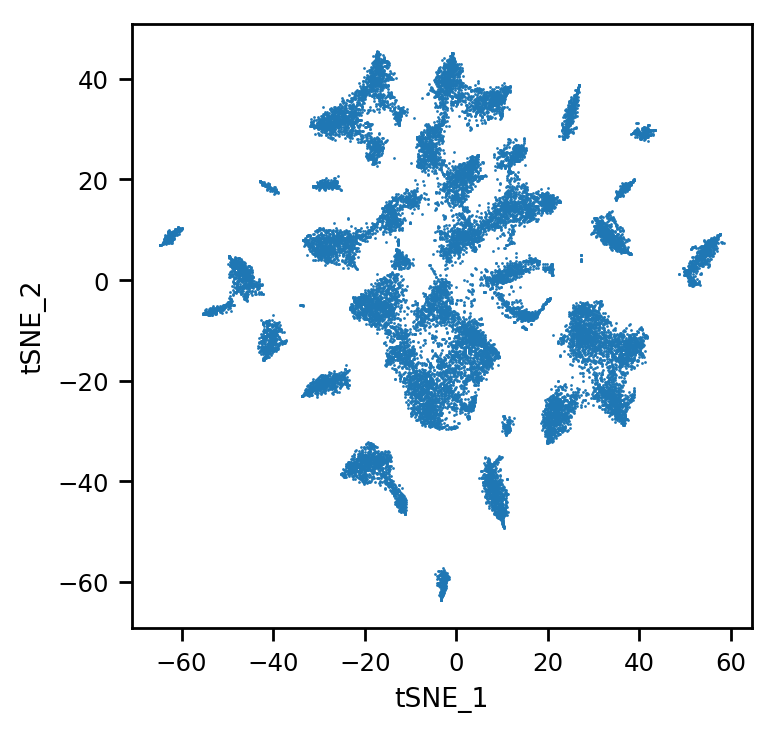

In [14]:
sns.scatterplot(x='tSNE_1', y='tSNE_2', data=data, linewidth=0, s=1)

## Take Home Message
- 